#**Component’s failure prediction in Marine Power Systems**

##**Business Problem**
Marine power systems are critical components of ships and offshore structures, and their failure
can have significant economic, safety, and environmental consequences. The use of machine
learning for each component’s failure analysis in marine power systems is an emerging trend that
can help to identify potential issues before they become major problems.

 In this project, your task
is to build machine learning models to predict whether the component will fail or not and identify
the potential factors that cause the failure.

##**NOTE**

I ADDED 3 MORE VARIABLES HERE

    PROPULSION: The action of driving or pushing water.
    (1)PROFULSION SPEED: On smaller vessels the propulsion system often consists of medium speed engines,often 720–750 rotations per minute, connected to a reduction gear reducing the revolutions from the engine speed to a more optimal propeller speed of about 100–120 revolutions per minute.
    (2)PROPULSION EFFICIENCY: Propulsive efficiency translates to the amount of power delivered to the propeller that can be used for propelling a ship. At the moment it stands around 70 percent.
    (3)ENERGY SOURCE: Marine energy, also known as marine and hydrokinetic energy or marine renewable energy, is a renewable power source that is harnessed from the natural movement of water, including waves, tides, and river and ocean currents.

##**Import all required Liabraries**

In [1]:
import pandas as pd               #it's read the dataset
import numpy as np                #do the mathematical & Statistical operations
import os

#Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Ignoring all warnings**

In [2]:
#ignore warnings if any occur
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the DataSet**

In [4]:
#Component failure dataset
data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Component_Failure_Marine_Power_Sytems/componet_Failure_1.xlsx")

##**Preprocessing**

In [5]:
#Check no:of rows and columns in the dataset
print(data.shape)

(6497, 17)


In [6]:
#Check first five rows of datasets
data.head()

Compnent Age  Monthly run time Location  Flow Rate  OPX Volume  \
0          0.55               9.5        B    0.99740         NaN   
1          0.32              12.7        A    0.99184         NaN   
2          0.57               9.7        B    0.99743         NaN   
3          0.50               9.5        B    0.99593         NaN   
4          0.44              10.8        A    0.99280         NaN   

   Max Output Rate  Propulsion1_Speed  Propulsion2_Efficiency Energy Sources  \
0             32.0                337                      70    Wind Energy   
1             28.0                308                      79    Wind Energy   
2             86.0                308                      72    Wind Energy   
3             84.0                301                      73    Wind Energy   
4            127.0                327                      70    Wind Energy   

   Sensor 1_Temparature  Sensor 2_Vibration  Sensor 3_Current  \
0                  10.0                1.90             0.580   
1                   6.9               10.55             0.300   
2                   7.2                2.30             0.660   
3                   7.1                1.80             0.755   
4                   7.0                4.90             0.290   

   Sensor 4_Voltage  Sensor 5_Insulation Resistance  Sensor 6 Power Quality  \
0              3.13                            0.22                   0.080   
1              3.07                            0.30                   0.037   
2              3.53                            0.03                   0.078   
3              3.19                            0.15                   0.107   
4              3.17                            0.37                   0.034   

   Days since maintenance  Target  
0                     9.0       0  
1                     4.0       0  
2                    16.0       0  
3                    20.0       0  
4                    26.0       0

In [7]:
#Check last five rows of datasets
data.tail()

Compnent Age  Monthly run time Location  Flow Rate  OPX Volume  \
6492          0.35               9.2        A    0.99240         NaN   
6493          0.74              11.5        B    0.99780         NaN   
6494          0.47              10.0        A    0.99480         NaN   
6495          0.53              10.5        B    0.99860         3.0   
6496          0.36              10.0        A    0.99272         NaN   

      Max Output Rate  Propulsion1_Speed  Propulsion2_Efficiency  \
6492             30.0                328                      76   
6493             14.0                306                      75   
6494            159.0                303                      73   
6495             21.0                326                      80   
6496             95.0                301                      79   

         Energy Sources  Sensor 1_Temparature  Sensor 2_Vibration  \
6492  Ocean Temparature                   5.6                0.80   
6493  Ocean Temparature                  11.6                3.65   
6494  Ocean Temparature                   7.2                1.80   
6495  Ocean Temparature                  11.1                3.10   
6496  Ocean Temparature                   8.5                1.10   

      Sensor 3_Current  Sensor 4_Voltage  Sensor 5_Insulation Resistance  \
6492              0.29              3.36                            0.05   
6493              0.53              3.05                            0.66   
6494              0.15              3.52                            0.39   
6495              0.35              3.17                            0.48   
6496              0.18              2.83                            0.30   

      Sensor 6 Power Quality  Days since maintenance  Target  
6492                   0.038                    11.0       0  
6493                   0.121                     6.0       1  
6494                   0.043                    21.0       0  
6495                   0.090                     5.0       0  
6496                   0.028                    34.0       0

In [8]:
#Decscriptive Statistics of NUMERICAL VARIABLES
data.describe()

Compnent Age  Monthly run time    Flow Rate  OPX Volume  \
count   6493.000000       6497.000000  6497.000000  805.000000   
mean       0.531215         10.491801     0.994697    5.631056   
std        0.148814          1.192712     0.002999    3.403142   
min        0.220000          8.000000     0.987110    0.000000   
25%        0.430000          9.500000     0.992340    3.000000   
50%        0.510000         10.300000     0.994890    6.000000   
75%        0.600000         11.300000     0.996990    9.000000   
max        2.000000         14.900000     1.038980   11.000000   

       Max Output Rate  Propulsion1_Speed  Propulsion2_Efficiency  \
count      6497.000000        6497.000000             6497.000000   
mean        115.744574         325.195629               74.940588   
std          56.521855          14.674456                3.139782   
min           6.000000         300.000000               70.000000   
25%          77.000000         312.000000               72.000000   
50%         118.000000         325.000000               75.000000   
75%         156.000000         338.000000               78.000000   
max         440.000000         350.000000               80.000000   

       Sensor 1_Temparature  Sensor 2_Vibration  Sensor 3_Current  \
count           6487.000000         6495.000000       6489.000000   
mean               7.216579            5.444326          0.339691   
std                1.296750            4.758125          0.164649   
min                3.800000            0.600000          0.080000   
25%                6.400000            1.800000          0.230000   
50%                7.000000            3.000000          0.290000   
75%                7.700000            8.100000          0.400000   
max               15.900000           65.800000          1.580000   

       Sensor 4_Voltage  Sensor 5_Insulation Resistance  \
count       6488.000000                     6494.000000   
mean           3.218395                        0.318722   
std            0.160748                        0.145265   
min            2.720000                        0.000000   
25%            3.110000                        0.250000   
50%            3.210000                        0.310000   
75%            3.320000                        0.390000   
max            4.010000                        1.660000   

       Sensor 6 Power Quality  Days since maintenance       Target  
count             6495.000000             6497.000000  6497.000000  
mean                 0.056042               30.525319     0.196552  
std                  0.035036               17.749400     0.397421  
min                  0.009000                1.000000     0.000000  
25%                  0.038000               17.000000     0.000000  
50%                  0.047000               29.000000     0.000000  
75%                  0.065000               41.000000     0.000000  
max                  0.611000              289.000000     1.000000

In [9]:
#Decscriptive Statistics of CATEGORICSL VARIABLES
data.describe(include='all')

Compnent Age  Monthly run time Location    Flow Rate  OPX Volume  \
count    6493.000000       6497.000000     6497  6497.000000  805.000000   
unique           NaN               NaN        2          NaN         NaN   
top              NaN               NaN        A          NaN         NaN   
freq             NaN               NaN     4898          NaN         NaN   
mean        0.531215         10.491801      NaN     0.994697    5.631056   
std         0.148814          1.192712      NaN     0.002999    3.403142   
min         0.220000          8.000000      NaN     0.987110    0.000000   
25%         0.430000          9.500000      NaN     0.992340    3.000000   
50%         0.510000         10.300000      NaN     0.994890    6.000000   
75%         0.600000         11.300000      NaN     0.996990    9.000000   
max         2.000000         14.900000      NaN     1.038980   11.000000   

        Max Output Rate  Propulsion1_Speed  Propulsion2_Efficiency  \
count       6497.000000        6497.000000             6497.000000   
unique              NaN                NaN                     NaN   
top                 NaN                NaN                     NaN   
freq                NaN                NaN                     NaN   
mean         115.744574         325.195629               74.940588   
std           56.521855          14.674456                3.139782   
min            6.000000         300.000000               70.000000   
25%           77.000000         312.000000               72.000000   
50%          118.000000         325.000000               75.000000   
75%          156.000000         338.000000               78.000000   
max          440.000000         350.000000               80.000000   

       Energy Sources  Sensor 1_Temparature  Sensor 2_Vibration  \
count            6497           6487.000000         6495.000000   
unique              7                   NaN                 NaN   
top       Wind Energy                   NaN                 NaN   
freq             1342                   NaN                 NaN   
mean              NaN              7.216579            5.444326   
std               NaN              1.296750            4.758125   
min               NaN              3.800000            0.600000   
25%               NaN              6.400000            1.800000   
50%               NaN              7.000000            3.000000   
75%               NaN              7.700000            8.100000   
max               NaN             15.900000           65.800000   

        Sensor 3_Current  Sensor 4_Voltage  Sensor 5_Insulation Resistance  \
count        6489.000000       6488.000000                     6494.000000   
unique               NaN               NaN                             NaN   
top                  NaN               NaN                             NaN   
freq                 NaN               NaN                             NaN   
mean            0.339691          3.218395                        0.318722   
std             0.164649          0.160748                        0.145265   
min             0.080000          2.720000                        0.000000   
25%             0.230000          3.110000                        0.250000   
50%             0.290000          3.210000                        0.310000   
75%             0.400000          3.320000                        0.390000   
max             1.580000          4.010000                        1.660000   

        Sensor 6 Power Quality  Days since maintenance       Target  
count              6495.000000             6497.000000  6497.000000  
unique                     NaN                     NaN          NaN  
top                        NaN                     NaN          NaN  
freq                       NaN                     NaN          NaN  
mean                  0.056042               30.525319     0.196552  
std                   0.035036               17.749400     0.397421  
min                   

In [10]:
#Handling the Duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Length: 6497, dtype: bool

In [11]:
#checking no.of unique values
data.nunique()

Compnent Age                      111
Monthly run time                  111
Location                            2
Flow Rate                         998
OPX Volume                         12
Max Output Rate                   276
Propulsion1_Speed                  51
Propulsion2_Efficiency             11
Energy Sources                      7
Sensor 1_Temparature              106
Sensor 2_Vibration                316
Sensor 3_Current                  187
Sensor 4_Voltage                  108
Sensor 5_Insulation Resistance     89
Sensor 6 Power Quality            214
Days since maintenance            135
Target                              2
dtype: int64

In [12]:
#checking null-values
data.isna().sum()

Compnent Age                         4
Monthly run time                     0
Location                             0
Flow Rate                            0
OPX Volume                        5692
Max Output Rate                      0
Propulsion1_Speed                    0
Propulsion2_Efficiency               0
Energy Sources                       0
Sensor 1_Temparature                10
Sensor 2_Vibration                   2
Sensor 3_Current                     8
Sensor 4_Voltage                     9
Sensor 5_Insulation Resistance       3
Sensor 6 Power Quality               2
Days since maintenance               0
Target                               0
dtype: int64

Here in OPX Volume there are 5692 missing values ​​in 6497 rows so even if we do impute on it, it will be duplicate attribute because of which we will not have anything so we are dropping it.

In [13]:
#Droping the OPX Volume column
data.drop(['OPX Volume'], axis=1,inplace=True)

In [14]:
#Complete Metadata of The Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Compnent Age                    6493 non-null   float64
 1   Monthly run time                6497 non-null   float64
 2   Location                        6497 non-null   object 
 3   Flow Rate                       6497 non-null   float64
 4   Max Output Rate                 6497 non-null   float64
 5   Propulsion1_Speed               6497 non-null   int64  
 6   Propulsion2_Efficiency          6497 non-null   int64  
 7   Energy Sources                  6497 non-null   object 
 8   Sensor 1_Temparature            6487 non-null   float64
 9   Sensor 2_Vibration              6495 non-null   float64
 10  Sensor 3_Current                6489 non-null   float64
 11  Sensor 4_Voltage                6488 non-null   float64
 12  Sensor 5_Insulation Resistance  64

In [15]:
data=data.astype({'Compnent Age':'float64','Monthly run time':'float64','Flow Rate':'float64','Max Output Rate':'float64','Sensor 1_Temparature':'float64','Sensor 2_Vibration':'float64','Sensor 3_Current':'float64','Sensor 4_Voltage':'float64','Sensor 5_Insulation Resistance':'float64','Sensor 6 Power Quality':'float64','Days since maintenance':'float64'})
data=data.astype({'Energy Sources':'category','Propulsion1_Speed':'category','Propulsion2_Efficiency':'category','Location':'category'})
data.dtypes

Compnent Age                       float64
Monthly run time                   float64
Location                          category
Flow Rate                          float64
Max Output Rate                    float64
Propulsion1_Speed                 category
Propulsion2_Efficiency            category
Energy Sources                    category
Sensor 1_Temparature               float64
Sensor 2_Vibration                 float64
Sensor 3_Current                   float64
Sensor 4_Voltage                   float64
Sensor 5_Insulation Resistance     float64
Sensor 6 Power Quality             float64
Days since maintenance             float64
Target                               int64
dtype: object

##**EXPLORATORY DATA ANALYSIS**

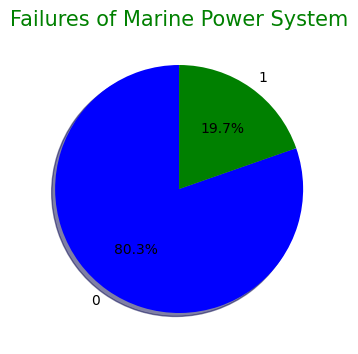

In [16]:
labels = data["Target"].value_counts().index
sizes = data["Target"].value_counts()
colors = ['blue','green']
plt.figure(figsize = (4,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('Failures of Marine Power System',color = 'green',fontsize = 15)
plt.show()

##1. How are the failures distributed?

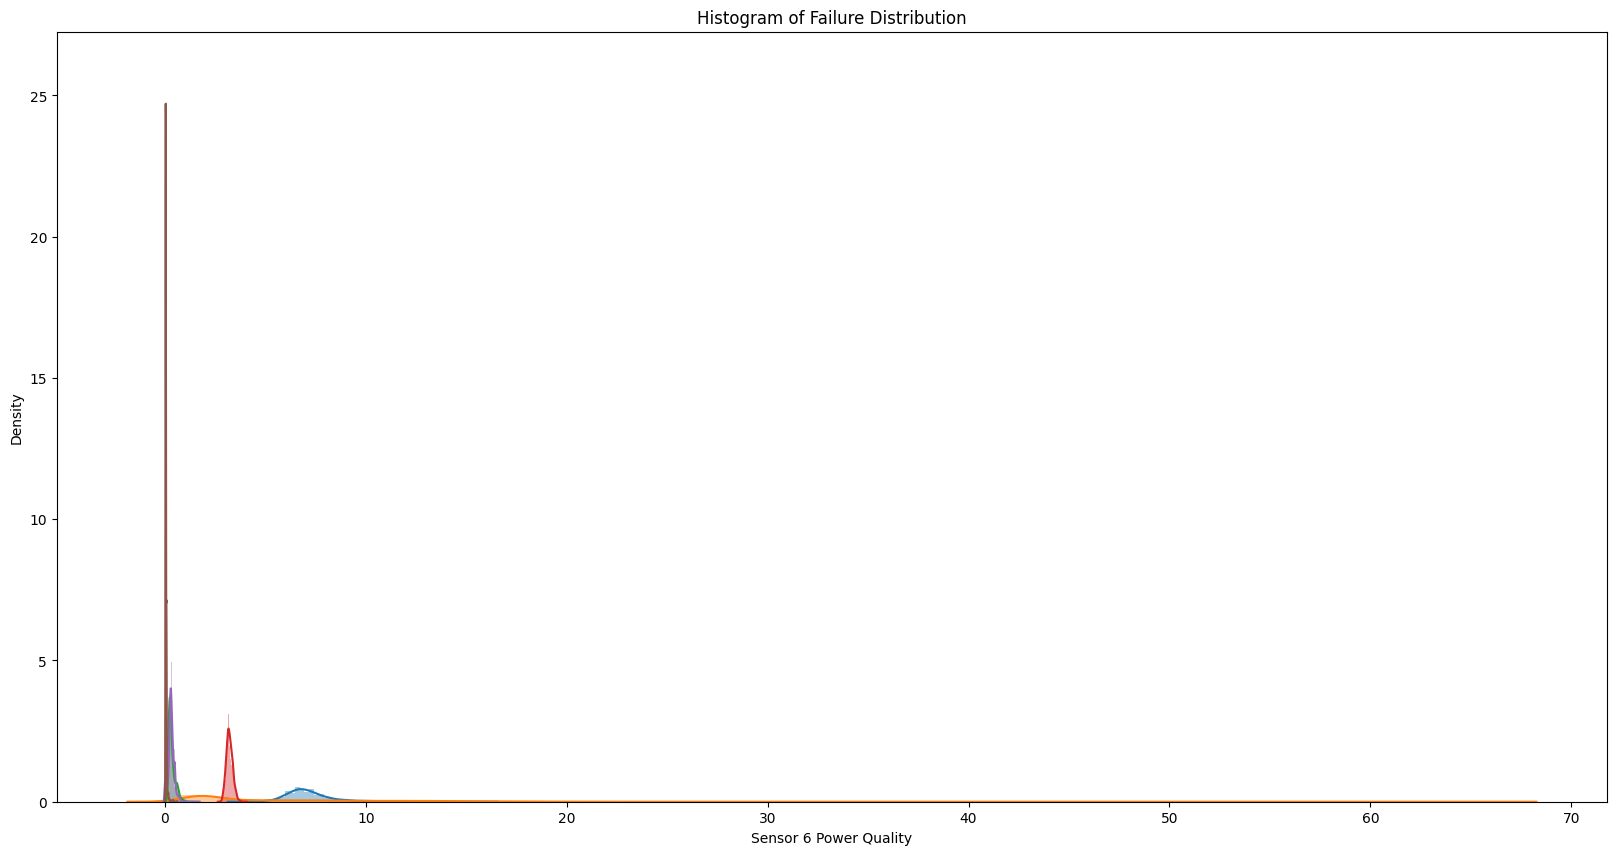

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(data["Sensor 1_Temparature"], kde = True).set_title("Histogram of Failure Distribution")
sns.distplot(data["Sensor 2_Vibration"], kde = True).set_title("Histogram of Failure Distribution")
sns.distplot(data["Sensor 3_Current"], kde = True).set_title("Histogram of Failure Distribution")
sns.distplot(data["Sensor 4_Voltage"], kde = True).set_title("Histogram of Failure Distribution")
sns.distplot(data["Sensor 5_Insulation Resistance"], kde = True).set_title("Histogram of Failure Distribution")
sns.distplot(data["Sensor 6 Power Quality"], kde = True).set_title("Histogram of Failure Distribution")

plt.show()

**Here what I am observing means not a single sensor is in the normal distribution stage, all are in right skewness**

##2. Do you see any relationship among the sensors to Target variable?

In [18]:
# cor_matrix = data['Sensor 1_Temparature', 'Sensor 2_Vibration', 'Sensor 3_Current', 'Sensor 4_Voltage', 'Sensor 5_Insulation Resistance', 'Sensor 6 Power Quality', 'Target'].corr()
# print(cor_matrix[Target])
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Correlation Plot of Selected Columns')
# plt.show()

Text(0.5, 1.0, 'Scatter plot of Sensor Temparature')

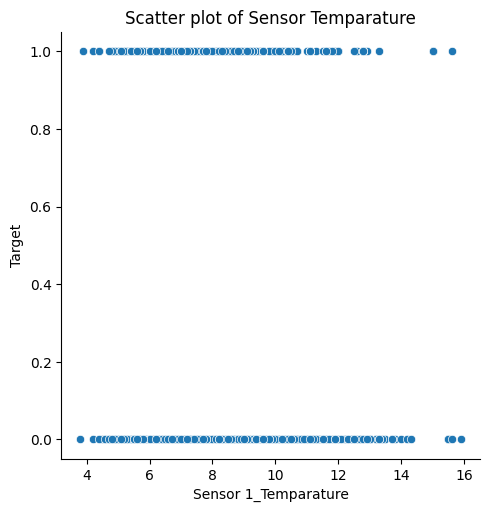

In [19]:
#Scatterplot of Sensor 1_Temparature column
sns.relplot(x ="Sensor 1_Temparature", y ="Target", data = data)
plt.title('Scatter plot of Sensor Temparature')

From the above we observe that as the **Sensor Temparature increases the Component Failure also get Increased**




Text(0.5, 1.0, 'Scatter plot of Sensor Vibration')

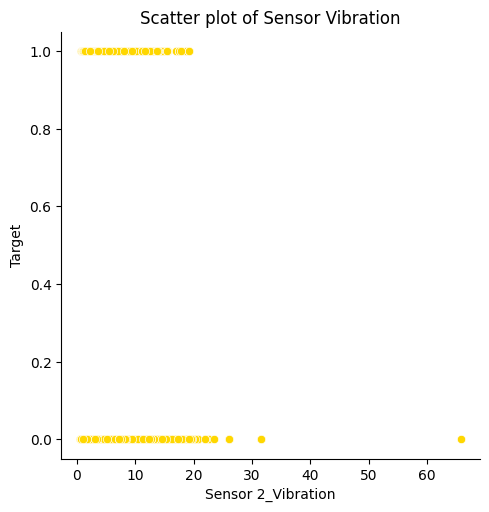

In [20]:
sns.relplot(data=data, x="Sensor 2_Vibration", y="Target",color='gold')
plt.title('Scatter plot of Sensor Vibration')

From the above we observe that as the **Sensor Vibrations increases the Component Failure less Increased**

Text(0.5, 1.0, 'Scatter plot of Sensor Current')

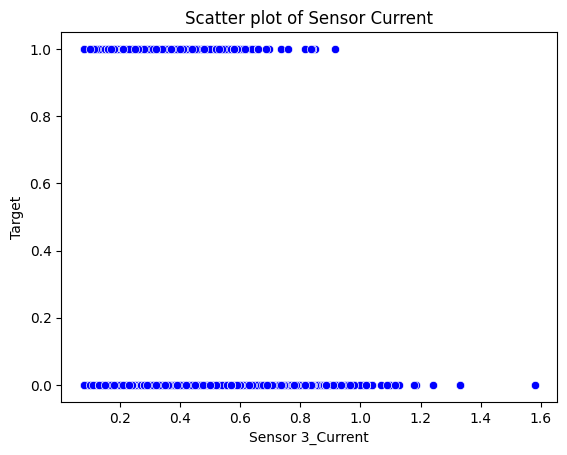

In [21]:
#scatter plot
sns.scatterplot(data=data,x='Sensor 3_Current',y='Target',color='Blue')
plt.title('Scatter plot of Sensor Current')

From the above we observe that as the **Sensor Current increases the Component Failure less decreased**

Text(0.5, 1.0, 'Scatter plot of Sensor Voltage')

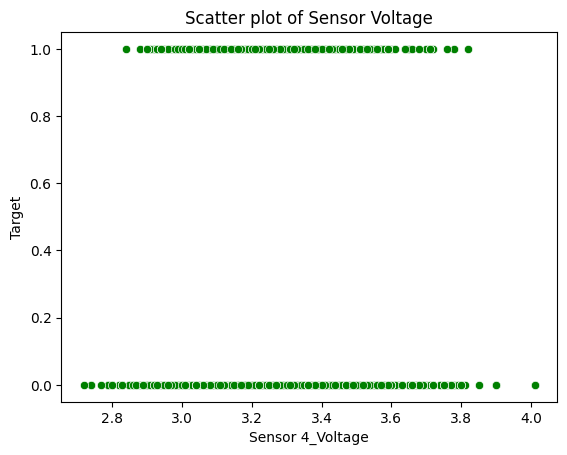

In [22]:
#scatter plot
sns.scatterplot(data=data,x='Sensor 4_Voltage',y='Target',color='Green')
plt.title('Scatter plot of Sensor Voltage')

From the above we observe that as the **Sensor Voltage increases the Componet Failure also nearly same**

Text(0.5, 1.0, 'Scatter plot of Sensor Insulation Resistance')

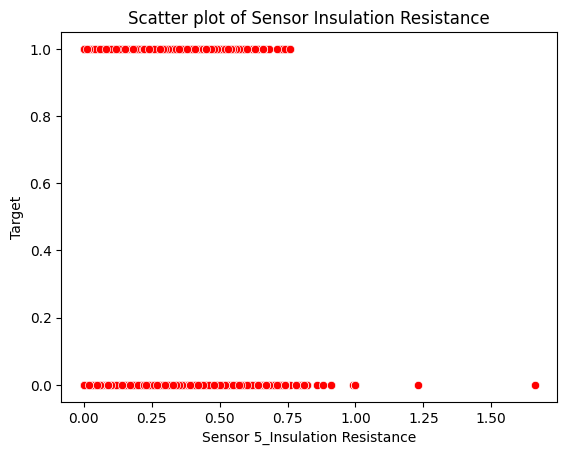

In [23]:
#scatter plot
sns.scatterplot(data=data,x='Sensor 5_Insulation Resistance',y='Target',color='Red')
plt.title('Scatter plot of Sensor Insulation Resistance')

From the above we observe that as the **Sensor Insurance_Resistance increases the Component Failure get less decresed**

Text(0.5, 1.0, 'Scatter plot of Sensor Power Quality')

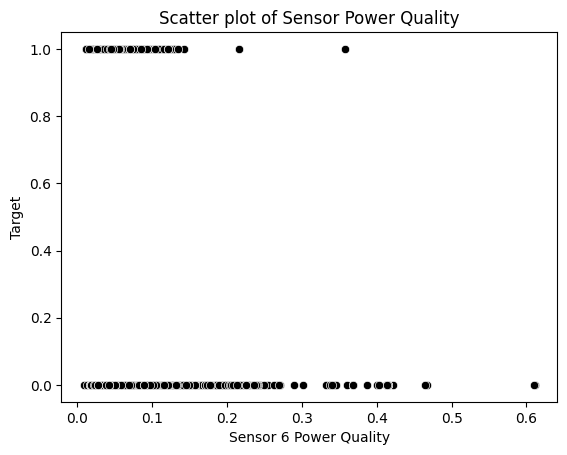

In [24]:
#scatter plot
sns.scatterplot(data=data,x='Sensor 6 Power Quality',y='Target',color='black')
plt.title('Scatter plot of Sensor Power Quality')

From the above we observe that as the **Sensor Power_Quality increases the Component Failure get decresed**

##3.Consider Monthly run time and the failures?

In [25]:
#create catplot with percent on y-axis
# plt.figure(figsize=(150,100))
# g=sns.catplot(x="Monthly run time", y="Target", data=data);
# g.set_yticklabels(['{:.0f}%'.format(y*100) for y in g.ax.get_yticks()])
# plt.show()

Text(0.5, 1.0, 'Scatter plot of Monthly run time')

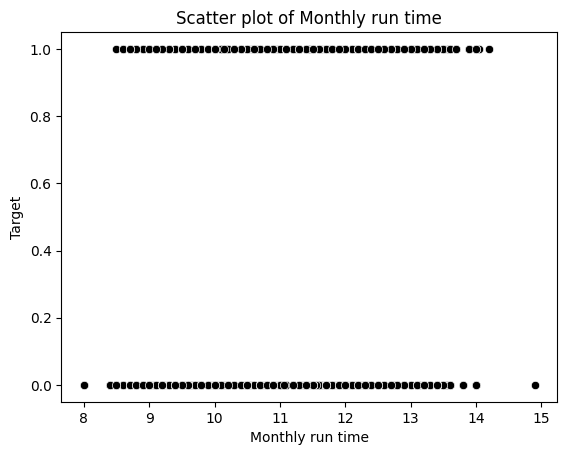

In [26]:
#scatter plot
sns.scatterplot(data=data,x='Monthly run time',y='Target',color='black')
plt.title('Scatter plot of Monthly run time')

##4.Will you consider “OPX volume”. Justify your answer

**ANS:** No, Because in the **OPX VOLUME column** we have number of missing values.If we impute with mean or median the total attribute will be duplicated, So that attribute does not useful for make good predictions so I droped this attribute.

##5.Is the failure of the component independent of the location?

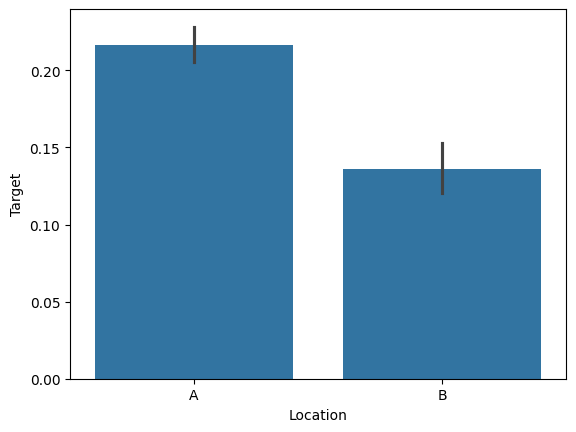

In [27]:
sns.barplot(x = 'Location',y = 'Target',data = data)
plt.show()

##6.Draw the “Pairplot” and write a summary on your observations

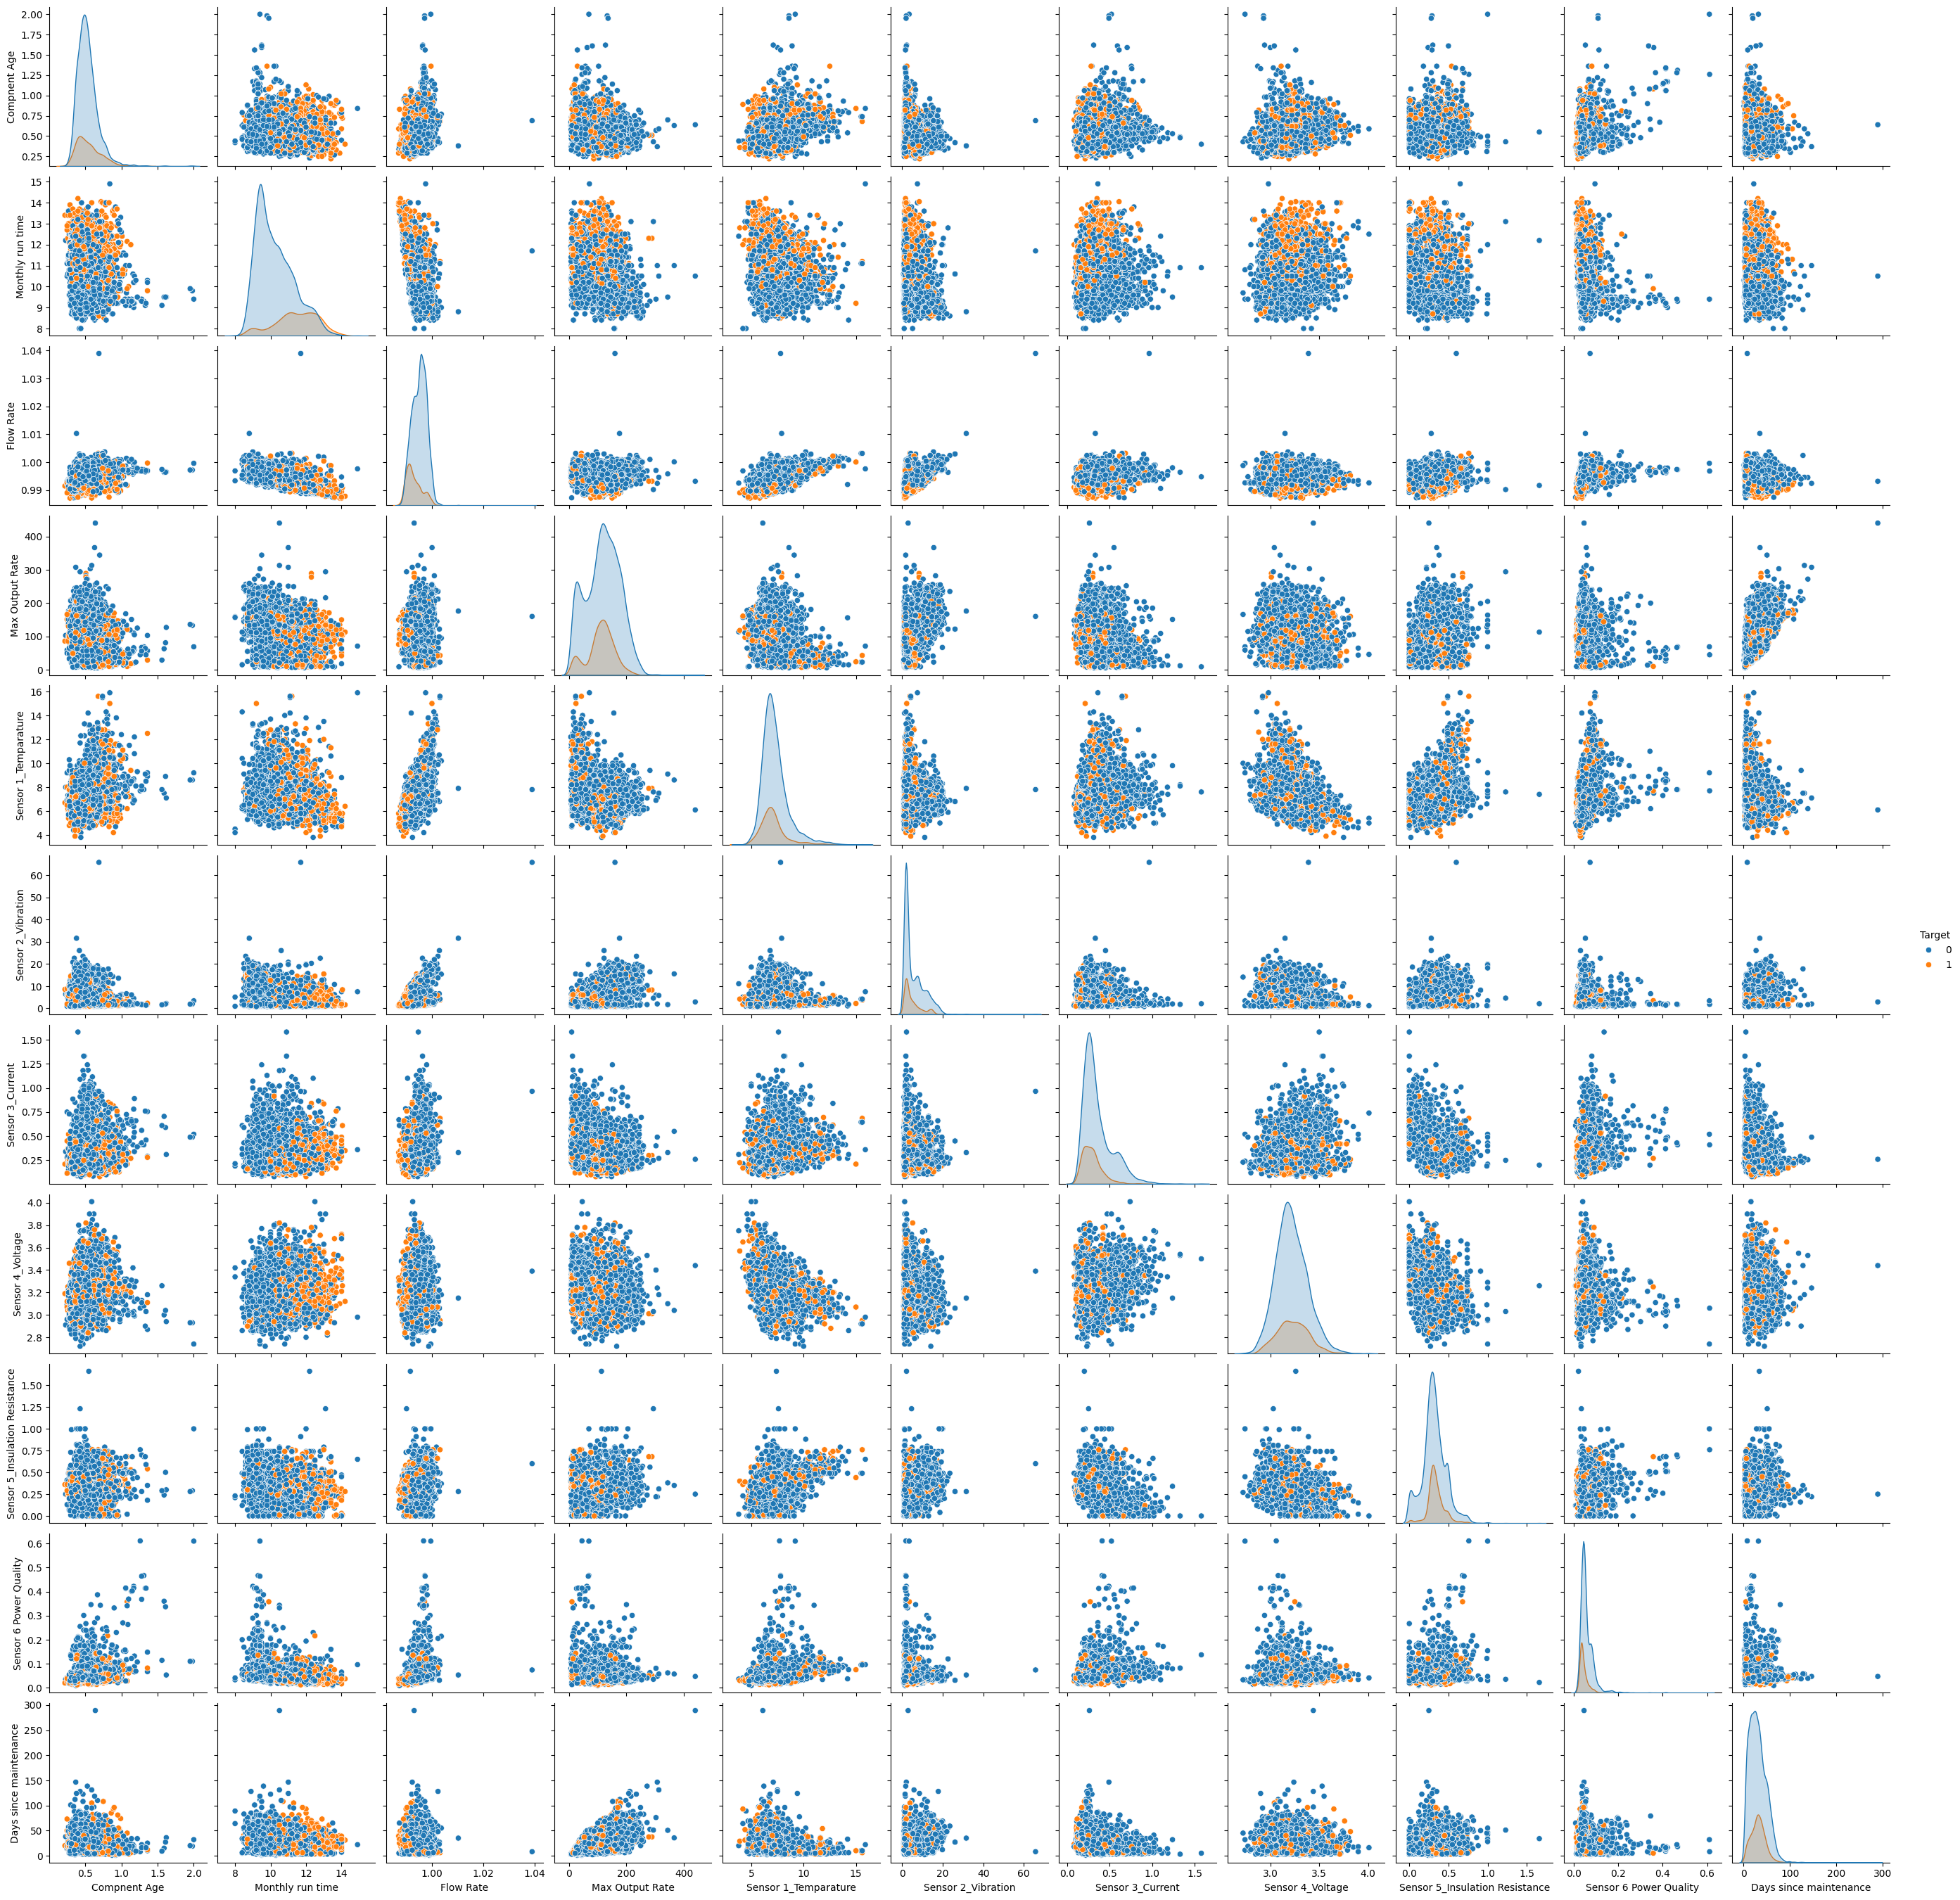

In [28]:
# pairplot with hue sex
sns.pairplot(data, hue ='Target')
# to show
plt.show()

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical

##7.Construct correlation heatmap on the sensor variables and write your comment

Text(0.5, 1.0, 'HEATMAP')

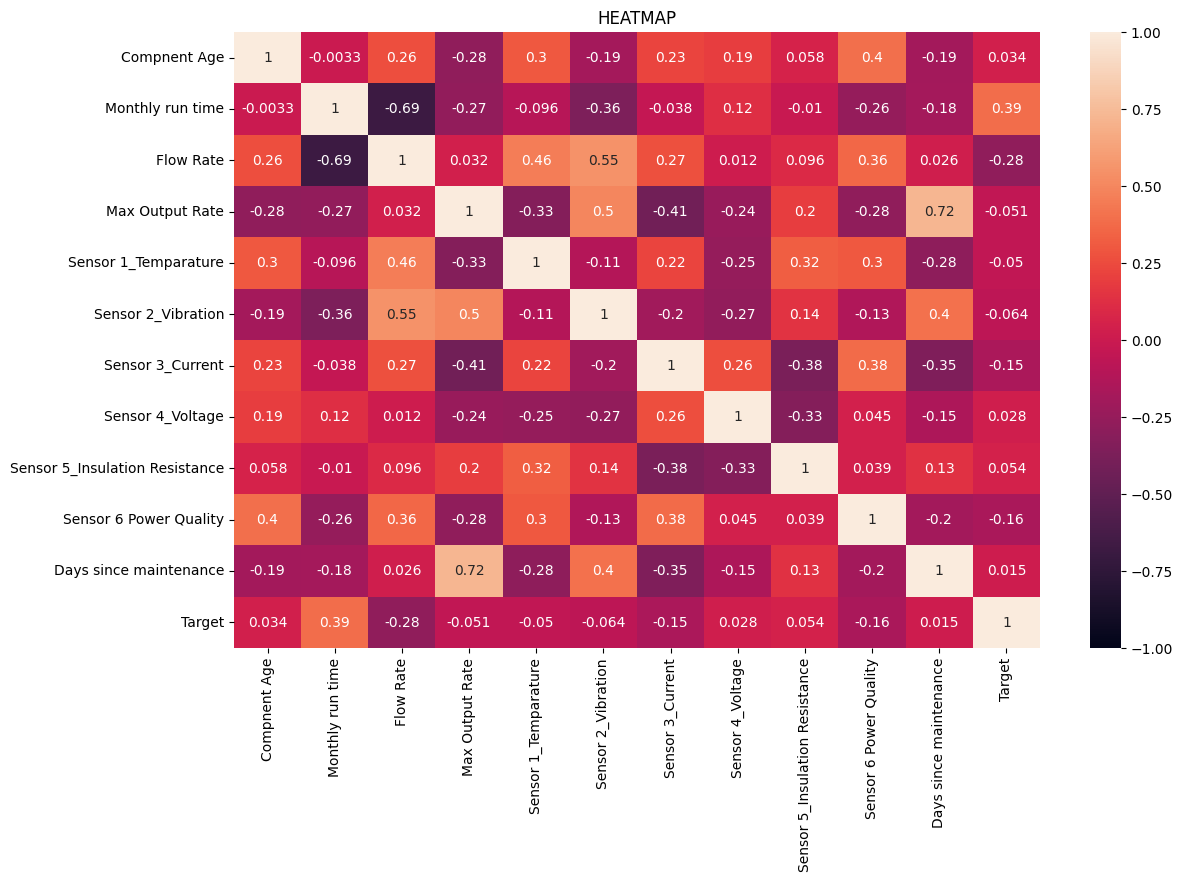

In [29]:
#Heat map
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1)
plt.title('HEATMAP')


Here observe that the correlation between their own attributes is 1

In [30]:
data=pd.get_dummies(data=data,drop_first=True)

In [31]:
data.dtypes

Compnent Age                               float64
Monthly run time                           float64
Flow Rate                                  float64
Max Output Rate                            float64
Sensor 1_Temparature                       float64
                                            ...   
Energy Sources_Ocean Thermal                 uint8
Energy Sources_Salinity                      uint8
Energy Sources_Tidal Stream                  uint8
Energy Sources_Tidal range and Offshore      uint8
Energy Sources_Wind Energy                   uint8
Length: 79, dtype: object

In [32]:
data.value_counts("Target")

Target
0    5220
1    1277
dtype: int64

## **TRAIN AND TEST SPLIT**

In [33]:
from sklearn.model_selection import train_test_split
X = data.drop(["Target"],axis=1)
y = data["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y,random_state=123)

In [34]:
 # check the dimensions of the data
# dim of IDV train data
print(X_train.shape)

# check for IDV test data
print(X_test.shape)

# check for DV train data
print(y_train.shape)

# check for DV test data
print(y_test.shape)

(4547, 78)
(1950, 78)
(4547,)
(1950,)


In [35]:
 # checking the frequency distribution of DV in train data
print(y_train.value_counts())
print(y_test.value_counts())
# check the frequency distribution of DV in test data
print()

0    3653
1     894
Name: Target, dtype: int64
0    1567
1     383
Name: Target, dtype: int64



#### Split the attributes into numerical and categorical types

In [36]:
X_train.dtypes

Compnent Age                               float64
Monthly run time                           float64
Flow Rate                                  float64
Max Output Rate                            float64
Sensor 1_Temparature                       float64
                                            ...   
Energy Sources_Ocean Thermal                 uint8
Energy Sources_Salinity                      uint8
Energy Sources_Tidal Stream                  uint8
Energy Sources_Tidal range and Offshore      uint8
Energy Sources_Wind Energy                   uint8
Length: 78, dtype: object

In [37]:
for cols in X_train.columns :
       if X_train[cols].dtype=='unit8':
         X_train[cols]=X_train[cols].astype('category')

In [38]:
for cols in X_test.columns :
       if X_test[cols].dtype=='unit8':
         X_test[cols]=X_test[cols].astype('category')

### Can we do it with simple code?

In [39]:
num_attr=X_train.select_dtypes(['float64']).columns
num_attr

Index(['Compnent Age', 'Monthly run time', 'Flow Rate', 'Max Output Rate',
       'Sensor 1_Temparature', 'Sensor 2_Vibration', 'Sensor 3_Current',
       'Sensor 4_Voltage', 'Sensor 5_Insulation Resistance',
       'Sensor 6 Power Quality', 'Days since maintenance'],
      dtype='object')

In [40]:
cat_attr = X_train.select_dtypes('uint8').columns
cat_attr

Index(['Location_B', 'Propulsion1_Speed_301', 'Propulsion1_Speed_302',
       'Propulsion1_Speed_303', 'Propulsion1_Speed_304',
       'Propulsion1_Speed_305', 'Propulsion1_Speed_306',
       'Propulsion1_Speed_307', 'Propulsion1_Speed_308',
       'Propulsion1_Speed_309', 'Propulsion1_Speed_310',
       'Propulsion1_Speed_311', 'Propulsion1_Speed_312',
       'Propulsion1_Speed_313', 'Propulsion1_Speed_314',
       'Propulsion1_Speed_315', 'Propulsion1_Speed_316',
       'Propulsion1_Speed_317', 'Propulsion1_Speed_318',
       'Propulsion1_Speed_319', 'Propulsion1_Speed_320',
       'Propulsion1_Speed_321', 'Propulsion1_Speed_322',
       'Propulsion1_Speed_323', 'Propulsion1_Speed_324',
       'Propulsion1_Speed_325', 'Propulsion1_Speed_326',
       'Propulsion1_Speed_327', 'Propulsion1_Speed_328',
       'Propulsion1_Speed_329', 'Propulsion1_Speed_330',
       'Propulsion1_Speed_331', 'Propulsion1_Speed_332',
       'Propulsion1_Speed_333', 'Propulsion1_Speed_334',
       'Propulsio

#### Checking for missing values in train and test dataset

In [41]:
X_train.isna().sum()

Compnent Age                               3
Monthly run time                           0
Flow Rate                                  0
Max Output Rate                            0
Sensor 1_Temparature                       8
                                          ..
Energy Sources_Ocean Thermal               0
Energy Sources_Salinity                    0
Energy Sources_Tidal Stream                0
Energy Sources_Tidal range and Offshore    0
Energy Sources_Wind Energy                 0
Length: 78, dtype: int64

In [42]:
X_test.isna().sum()

Compnent Age                               1
Monthly run time                           0
Flow Rate                                  0
Max Output Rate                            0
Sensor 1_Temparature                       2
                                          ..
Energy Sources_Ocean Thermal               0
Energy Sources_Salinity                    0
Energy Sources_Tidal Stream                0
Energy Sources_Tidal range and Offshore    0
Energy Sources_Wind Energy                 0
Length: 78, dtype: int64

### Imputation for missing values for numeric attributes

In [43]:
# creating an object of imputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(X_train[num_attr])

# imputing on train data
X_train[num_attr] = imputer.transform(X_train[num_attr])

# impute on test data
X_test[num_attr] = imputer.transform(X_test[num_attr])

###Imputation for missing values for categoric attributes

In [44]:
imputer_cat=SimpleImputer(strategy='most_frequent')
imputer_cat=imputer_cat.fit(X_train[cat_attr])

X_train[cat_attr]=imputer_cat.transform(X_train[cat_attr])
X_test[cat_attr]=imputer_cat.transform(X_test[cat_attr])

In [45]:
X_train.isna().sum()

Compnent Age                               0
Monthly run time                           0
Flow Rate                                  0
Max Output Rate                            0
Sensor 1_Temparature                       0
                                          ..
Energy Sources_Ocean Thermal               0
Energy Sources_Salinity                    0
Energy Sources_Tidal Stream                0
Energy Sources_Tidal range and Offshore    0
Energy Sources_Wind Energy                 0
Length: 78, dtype: int64

In [46]:
X_test.isna().sum()

Compnent Age                               0
Monthly run time                           0
Flow Rate                                  0
Max Output Rate                            0
Sensor 1_Temparature                       0
                                          ..
Energy Sources_Ocean Thermal               0
Energy Sources_Salinity                    0
Energy Sources_Tidal Stream                0
Energy Sources_Tidal range and Offshore    0
Energy Sources_Wind Energy                 0
Length: 78, dtype: int64

### **Standard Scaler(Numerical Variables)**

In [47]:
from sklearn.preprocessing import StandardScaler

# creating an object of scaler
scaler = StandardScaler()
# fit on train
scaler.fit(X_train[num_attr])

StandardScaler()

In [48]:
# transform on train
X_train[num_attr]=scaler.transform(X_train[num_attr])
# transform on test
X_test[num_attr]=scaler.transform(X_test[num_attr])

In [49]:
print(X_train.shape)
print(X_test.shape)

print(type(X_train))
print(type(X_test))

(4547, 78)
(1950, 78)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### **One Hot Encoding(Categorical Variables)**

In [50]:
#import one hot encoder
# from sklearn.preprocessing import OneHotEncoder

In [51]:
# #Assing var ohe to onehotencoder
# ohe = OneHotEncoder()

# #Fit the cat_cols of X_train data
# ohe.fit(X_train[cat_attr])

In [52]:
#transform the fitted data to train_and val
# X_train_cat = ohe.transform(X_train[cat_attr])
# X_test_cat  = ohe.transform(X_test[cat_attr])

# columns_ohe = list(ohe.get_feature_names_out(cat_attr))

In [53]:
# X_train_cat = pd.DataFrame(X_train_cat.toarray(), columns=columns_ohe)
# X_test_cat  = pd.DataFrame(X_test_cat.toarray(), columns=columns_ohe)

##**Model Buildings**

In [54]:
from sklearn.metrics import confusion_matrix # here recall,precision,etc values
from sklearn.metrics import classification_report #here recall,precision,etc calculated values
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

**What is the performance metric you choose and explain the reason for the choice**

Here our prediction is Component failure's of Marine Power System so we can choose **SPECIFICITY** for Predict True Negative of Component Failure.

**Specificity:** it can be described as the algorithm/model's ability to predict a true negative of each category available. In literature, it is also known simply as the true negative rate.

**Specificity=TN(True Negative)/FP+TN(Actual Negative)**

##**(1)Logistic Model**

In [55]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay   : ", accuracy_score(act, pred))
    print("Recall     : ", recall_score(act, pred))
    print("Precision  : ", precision_score(act, pred))
    print("F1_score   : ", f1_score(act, pred))
    print("Specificity: ",recall_score(act, pred, pos_label=0))

In [56]:
scores = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1_Score',  'Train_Specificity',
                               'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1_Score','Test_Specificity'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_accuracy    = accuracy_score(train_actual,  train_predicted)
    train_recall      = recall_score(train_actual,  train_predicted, average="weighted")
    train_precision   = precision_score(train_actual,  train_predicted, average="weighted")
    train_f1score     = f1_score(train_actual,  train_predicted, average="weighted")
    train_specificity = recall_score(train_actual,  train_predicted, average="weighted")

    test_accuracy     = accuracy_score(test_actual, test_predicted,)
    test_recall       = recall_score(test_actual, test_predicted, average="weighted")
    test_precision    = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score      = f1_score(test_actual, test_predicted, average="weighted")
    test_specificity  = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description,
                                                  train_accuracy, train_recall, train_precision, train_f1score, train_specificity,
                                                  test_accuracy, test_recall, test_precision, test_f1score, test_specificity],
                                                 index=scores.columns ),
                                       ignore_index=True)

    return(dataframe)

In [57]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [58]:
#As we fit the data for x_train and predicitng for both x_test and x_train
train_pred = logistic_model.predict(X_train)
test_pred = logistic_model.predict(X_test)

In [59]:
#confusion matrix on train & test
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[3495  158]
 [ 618  276]]
Accurcay   :  0.8293380250714757
Recall     :  0.3087248322147651
Precision  :  0.6359447004608295
F1_score   :  0.41566265060240964
Specificity:  0.9567478784560635
--Test--
Confusion Matrix 
 [[1490   77]
 [ 265  118]]
Accurcay   :  0.8246153846153846
Recall     :  0.30809399477806787
Precision  :  0.6051282051282051
F1_score   :  0.4083044982698962
Specificity:  0.9508615188257817


In [60]:
scores = get_metrics(y_train, train_pred, y_test, test_pred, "Logistic_Model", scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic_Model        0.829338      0.829338         0.807709   

   Train_F1_Score  Train_Specificity  Test_Accuracy  Test_Recall  \
0        0.804835           0.829338       0.824615     0.824615   

   Test_Precision  Test_F1_Score  Test_Specificity  
0        0.801103       0.801055          0.801055

##**(2)Decision Tree**

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from imblearn.over_sampling import SMOTE
import graphviz
import math

In [62]:
#Assign decision tree regressor for a var clf
dt_clf = DecisionTreeClassifier()

#Fitting the data for X_train anf y_train
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
importances = dt_clf.feature_importances_
importances

array([0.07637955, 0.20684972, 0.05595575, 0.06438948, 0.05292803,
       0.09741885, 0.07370399, 0.05167627, 0.06150734, 0.05846323,
       0.04739233, 0.        , 0.        , 0.        , 0.00414221,
       0.0014856 , 0.00243174, 0.00303942, 0.00132903, 0.00487826,
       0.00480393, 0.00423537, 0.00331206, 0.00076689, 0.        ,
       0.        , 0.00146448, 0.00319319, 0.0040758 , 0.00204869,
       0.00468547, 0.00138568, 0.00111186, 0.00248725, 0.        ,
       0.00234715, 0.00280449, 0.00104424, 0.00186115, 0.00256225,
       0.00198245, 0.0031537 , 0.00413605, 0.00639968, 0.00111385,
       0.00511325, 0.        , 0.0024637 , 0.        , 0.00203512,
       0.0031085 , 0.        , 0.00230977, 0.00466756, 0.00202519,
       0.        , 0.        , 0.00104424, 0.00027068, 0.00071756,
       0.0013053 , 0.00122756, 0.00409022, 0.00041609, 0.0031882 ,
       0.00339889, 0.00208847, 0.00535761, 0.00445771, 0.00521226,
       0.00392915, 0.00406168, 0.00063814, 0.00205451, 0.00092

In [64]:
#features are working in apart of target variable
indices = np.argsort(importances)[::-1]
ind_attr_names = X_train.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

0                   1             2                 3   \
0  Monthly run time  Sensor 2_Vibration  Compnent Age  Sensor 3_Current   
1           0.20685            0.097419       0.07638          0.073704   

                4                               5                       6   \
0  Max Output Rate  Sensor 5_Insulation Resistance  Sensor 6 Power Quality   
1         0.064389                        0.061507                0.058463   

          7                     8                 9   ...  \
0  Flow Rate  Sensor 1_Temparature  Sensor 4_Voltage  ...   
1   0.055956              0.052928          0.051676  ...   

                      68                     69                     70  \
0  Propulsion1_Speed_340  Propulsion1_Speed_344  Propulsion1_Speed_345   
1                    0.0                    0.0                    0.0   

                      71          72                     73  \
0  Propulsion1_Speed_335  Location_B  Propulsion1_Speed_301   
1                    0.0         0.0                    0.0   

                      74                     75                     76  \
0  Propulsion1_Speed_323  Propulsion1_Speed_313  Propulsion1_Speed_314   
1                    0.0                    0.0                    0.0   

                      77  
0  Propulsion1_Speed_302  
1                    0.0  

[2 rows x 78 columns]

In [65]:
dt_clf.classes_

array([0, 1])

In [66]:
#As we fit the data for x_train and predicitng for both x_test and x_train
train_pred = dt_clf.predict(X_train)
test_pred = dt_clf.predict(X_test)

In [67]:
#confusion matrix on train & test
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[3653    0]
 [   0  894]]
Accurcay   :  1.0
Recall     :  1.0
Precision  :  1.0
F1_score   :  1.0
Specificity:  1.0
--Test--
Confusion Matrix 
 [[1362  205]
 [ 182  201]]
Accurcay   :  0.8015384615384615
Recall     :  0.5248041775456919
Precision  :  0.49507389162561577
F1_score   :  0.5095057034220533
Specificity:  0.8691767708998086


### DT with Grid Search for Paramater Tuning

#### Define param and instantiate GridSearchCV

In [68]:
# Create a based model
dt_grid = DecisionTreeClassifier()

#Create the parameter grid based on the results of decision search
param_dist =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}


# Instantiate the grid search model
dt_cv_grid = GridSearchCV(estimator=dt_grid,param_grid=param_dist,cv=10,n_jobs=1,verbose=2)

In [69]:
# Fit the dt_cv_grid to the data
dt_cv_grid.fit(X=X_train, y=y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....................max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....................max_depth=1, min_sa

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3]},
             verbose=2)

In [70]:
dt_cv_grid.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [71]:

### Train data Specificity
evaluate_model(y_train, train_pred)
### Test data Specificity
evaluate_model(y_test,  test_pred)

Confusion Matrix 
 [[3653    0]
 [   0  894]]
Accurcay   :  1.0
Recall     :  1.0
Precision  :  1.0
F1_score   :  1.0
Specificity:  1.0
Confusion Matrix 
 [[1362  205]
 [ 182  201]]
Accurcay   :  0.8015384615384615
Recall     :  0.5248041775456919
Precision  :  0.49507389162561577
F1_score   :  0.5095057034220533
Specificity:  0.8691767708998086


In [72]:
scores = get_metrics(y_train, train_pred, y_test, test_pred, "Decision_Tree", scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic_Model        0.829338      0.829338         0.807709   
1   Decision_Tree        1.000000      1.000000         1.000000   

   Train_F1_Score  Train_Specificity  Test_Accuracy  Test_Recall  \
0        0.804835           0.829338       0.824615     0.824615   
1        1.000000           1.000000       0.801538     0.801538   

   Test_Precision  Test_F1_Score  Test_Specificity  
0        0.801103       0.801055          0.801055  
1        0.806104       0.803697          0.803697

##**(3)Random Forest**

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [74]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
train_pred = rf_clf.predict(X_train)
test_pred = rf_clf.predict(X_test)

In [76]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[3653    0]
 [   0  894]]
Accurcay   :  1.0
Recall     :  1.0
Precision  :  1.0
F1_score   :  1.0
Specificity:  1.0
--Test--
Confusion Matrix 
 [[1521   46]
 [ 223  160]]
Accurcay   :  0.862051282051282
Recall     :  0.4177545691906005
Precision  :  0.7766990291262136
F1_score   :  0.5432937181663837
Specificity:  0.9706445437141034


### RF with Grid Search for Paramater Tuning

#### Define param and instantiate GridSearchCV

In [77]:
# # Create a based model
# rf_grid= RandomForestClassifier()

# #Create the parameter grid based on the results of random search
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 400]
# }

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid,
#                           cv = 3, n_jobs = -1, verbose = 2)

In [78]:
# Fit the grid search to the data
# grid_search.fit(X=X_train, y=y_train)

In [79]:
#grid_search.best_params_

In [80]:
### Train data Specificity
# evaluate_model(y_train, train_pred)
### Test data Specificity
# evaluate_model(y_test,  test_pred)

In [81]:
# scores = get_metrics(y_train, train_pred, y_test, test_pred, "Random_Forest", scores)
# scores

##**(4)SVM**

In [82]:
from sklearn.svm import SVC
linear_svm = SVC(kernel='linear',C=1)

In [83]:
linear_svm.fit(X=X_train,y=y_train)

SVC(C=1, kernel='linear')

In [84]:
train_pred = linear_svm.predict(X_train)
test_pred = linear_svm.predict(X_test)

In [85]:
### Train data Specificity
evaluate_model(y_train, train_pred)

### Test data Specificity
evaluate_model(y_test, test_pred)

Confusion Matrix 
 [[3653    0]
 [ 894    0]]
Accurcay   :  0.8033868484715196
Recall     :  0.0
Precision  :  0.0
F1_score   :  0.0
Specificity:  1.0
Confusion Matrix 
 [[1567    0]
 [ 383    0]]
Accurcay   :  0.8035897435897436
Recall     :  0.0
Precision  :  0.0
F1_score   :  0.0
Specificity:  1.0


### SVM with Grid Search for Paramater Tuning

#### Define param and instantiate GridSearchCV

In [86]:
svc_grid = SVC()

param_grid = {
                'C': [0.001, 0.01, 0.1, 1, 10],
                'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                'kernel':['linear','rbf','poly']
             }

svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid =param_grid, cv = 3)

In [87]:
svc_cv_grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [88]:
svc_cv_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [89]:
### Train data Specificity
evaluate_model(y_train, train_pred)

### Test data Specificity
evaluate_model(y_test,  test_pred)

Confusion Matrix 
 [[3653    0]
 [ 894    0]]
Accurcay   :  0.8033868484715196
Recall     :  0.0
Precision  :  0.0
F1_score   :  0.0
Specificity:  1.0
Confusion Matrix 
 [[1567    0]
 [ 383    0]]
Accurcay   :  0.8035897435897436
Recall     :  0.0
Precision  :  0.0
F1_score   :  0.0
Specificity:  1.0


In [90]:
scores = get_metrics(y_train, train_pred, y_test, test_pred, "SVM", scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic_Model        0.829338      0.829338         0.807709   
1   Decision_Tree        1.000000      1.000000         1.000000   
2             SVM        0.803387      0.803387         0.645430   

   Train_F1_Score  Train_Specificity  Test_Accuracy  Test_Recall  \
0        0.804835           0.829338       0.824615     0.824615   
1        1.000000           1.000000       0.801538     0.801538   
2        0.715798           0.803387       0.803590     0.803590   

   Test_Precision  Test_F1_Score  Test_Specificity  
0        0.801103       0.801055          0.801055  
1        0.806104       0.803697          0.803697  
2        0.645756       0.716079          0.716079

##**(5)Ada Boost**

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

clf_adaboost =  AdaBoostClassifier()

In [92]:
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [93]:
train_pred = clf_adaboost.predict(X_train)
test_pred= clf_adaboost.predict(X_test)

In [94]:
### Train data Specificity
evaluate_model(y_train, train_pred)

### Test data Specificity
evaluate_model(y_test,  test_pred)

Confusion Matrix 
 [[3438  215]
 [ 552  342]]
Accurcay   :  0.8313173521002859
Recall     :  0.3825503355704698
Precision  :  0.6140035906642729
F1_score   :  0.4713990351481737
Specificity:  0.9411442649876813
Confusion Matrix 
 [[1467  100]
 [ 262  121]]
Accurcay   :  0.8143589743589743
Recall     :  0.31592689295039167
Precision  :  0.5475113122171946
F1_score   :  0.4006622516556292
Specificity:  0.9361837906828334


In [95]:
scores = get_metrics(y_train, train_pred, y_test, test_pred, "Adaboost", scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic_Model        0.829338      0.829338         0.807709   
1   Decision_Tree        1.000000      1.000000         1.000000   
2             SVM        0.803387      0.803387         0.645430   
3        Adaboost        0.831317      0.831317         0.812963   

   Train_F1_Score  Train_Specificity  Test_Accuracy  Test_Recall  \
0        0.804835           0.829338       0.824615     0.824615   
1        1.000000           1.000000       0.801538     0.801538   
2        0.715798           0.803387       0.803590     0.803590   
3        0.815448           0.831317       0.814359     0.814359   

   Test_Precision  Test_F1_Score  Test_Specificity  
0        0.801103       0.801055          0.801055  
1        0.806104       0.803697          0.803697  
2        0.645756       0.716079          0.716079  
3        0.789356       0.794026          0.794026

### XGBOOST

In [96]:
clf_xgb = XGBClassifier()

In [97]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
train_pred = clf_xgb.predict(X_train)
test_pred= clf_xgb.predict(X_test)

In [99]:
### Train data Specificity
evaluate_model(y_train, train_pred)

### Test data Specificity
evaluate_model(y_test,  test_pred)

Confusion Matrix 
 [[3652    1]
 [   5  889]]
Accurcay   :  0.9986804486474599
Recall     :  0.9944071588366891
Precision  :  0.998876404494382
F1_score   :  0.9966367713004485
Specificity:  0.9997262523952916
Confusion Matrix 
 [[1481   86]
 [ 184  199]]
Accurcay   :  0.8615384615384616
Recall     :  0.5195822454308094
Precision  :  0.6982456140350877
F1_score   :  0.5958083832335329
Specificity:  0.9451180599872367


In [100]:
XGB = XGBClassifier(n_jobs=-1)

# Use a grid over parameters of interest
param_grid = {
    'colsample_bytree': np.linspace(0.6, 0.8, 2),
    'n_estimators': [50, 100],
    'max_depth': [5, 6]}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv=3)

In [101]:
CV_XGB.fit(X=X_train, y=y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...in=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': array([0.6, 0.8]),
                         'max_depth': [5, 6], 'n_estimators': [50, 100]})

Find best Model

In [102]:
best_xgb_model = CV_XGB.best_estimator_

In [103]:
print(CV_XGB.best_score_, CV_XGB.best_params_)

0.8588098783493124 {'colsample_bytree': 0.8, 'max_depth': 6, 'n_estimators': 100}


In [104]:
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
train_pred = best_xgb_model.predict(X_train)
test_pred= best_xgb_model.predict(X_test)

In [106]:
### Train data Specificity
evaluate_model(y_train, train_pred)

### Test data Specificity
evaluate_model(y_test,  test_pred)

Confusion Matrix 
 [[3652    1]
 [  10  884]]
Accurcay   :  0.9975808225203431
Recall     :  0.9888143176733781
Precision  :  0.9988700564971752
F1_score   :  0.9938167509836987
Specificity:  0.9997262523952916
Confusion Matrix 
 [[1486   81]
 [ 192  191]]
Accurcay   :  0.86
Recall     :  0.49869451697127937
Precision  :  0.7022058823529411
F1_score   :  0.583206106870229
Specificity:  0.9483088704530951


In [107]:
scores = get_metrics(y_train, train_pred, y_test, test_pred, "XGBoost", scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic_Model        0.829338      0.829338         0.807709   
1   Decision_Tree        1.000000      1.000000         1.000000   
2             SVM        0.803387      0.803387         0.645430   
3        Adaboost        0.831317      0.831317         0.812963   
4         XGBoost        0.997581      0.997581         0.997584   

   Train_F1_Score  Train_Specificity  Test_Accuracy  Test_Recall  \
0        0.804835           0.829338       0.824615     0.824615   
1        1.000000           1.000000       0.801538     0.801538   
2        0.715798           0.803387       0.803590     0.803590   
3        0.815448           0.831317       0.814359     0.814359   
4        0.997576           0.997581       0.860000     0.860000   

   Test_Precision  Test_F1_Score  Test_Specificity  
0        0.801103       0.801055          0.801055  
1        0.806104       0.803697          0.803697  
2        0.645756       0.716079          0.716079  
3        0.789356       0.794026          0.794026  
4        0.849562       0.850532          0.850532

#**(6)Stacking Model**

In [108]:
from sklearn.ensemble import VotingClassifier

In [110]:
voting_clf = VotingClassifier(estimators=[('logistic_model',logistic_model),('dt_grid',dt_grid),('rf_clf',rf_clf),('svc_grid',svc_grid),('clf_adaboost',clf_adaboost),('clf_xgb',clf_xgb)])

In [111]:
voting_clf

VotingClassifier(estimators=[('logistic_model', LogisticRegression()),
                             ('dt_grid', DecisionTreeClassifier()),
                             ('rf_clf', RandomForestClassifier()),
                             ('svc_grid', SVC()),
                             ('clf_adaboost', AdaBoostClassifier()),
                             ('clf_xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            ear...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [112]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('logistic_model', LogisticRegression()),
                             ('dt_grid', DecisionTreeClassifier()),
                             ('rf_clf', RandomForestClassifier()),
                             ('svc_grid', SVC()),
                             ('clf_adaboost', AdaBoostClassifier()),
                             ('clf_xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            ear...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [113]:
train_pred = voting_clf.predict(X_train)
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
test_pred = voting_clf.predict(X_test)
test_pred

array([0, 1, 0, ..., 0, 0, 0])

Performence Metric

In [115]:
scores = get_metrics(y_train, train_pred, y_test, test_pred, "Stacking", scores)
scores

Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic_Model        0.829338      0.829338         0.807709   
1   Decision_Tree        1.000000      1.000000         1.000000   
2             SVM        0.803387      0.803387         0.645430   
3        Adaboost        0.831317      0.831317         0.812963   
4         XGBoost        0.997581      0.997581         0.997584   
5        Stacking        0.905432      0.905432         0.915125   

   Train_F1_Score  Train_Specificity  Test_Accuracy  Test_Recall  \
0        0.804835           0.829338       0.824615     0.824615   
1        1.000000           1.000000       0.801538     0.801538   
2        0.715798           0.803387       0.803590     0.803590   
3        0.815448           0.831317       0.814359     0.814359   
4        0.997576           0.997581       0.860000     0.860000   
5        0.893168           0.905432       0.836410     0.836410   

   Test_Precision  Test_F1_Score  Test_Specificity  
0        0.801103       0.801055          0.801055  
1        0.806104       0.803697          0.803697  
2        0.645756       0.716079          0.716079  
3        0.789356       0.794026          0.794026  
4        0.849562       0.850532          0.850532  
5        0.821299       0.805111          0.805111

Well, interesting results were obtained. As can be seen, If we compare all the models, **we get good predictions in XGBoost model the train specificity is 0.9986 and test specificity is 0.8627**

In [117]:
# %%shell
# jupyter nbconvert --to html /content/Ashok_project_01.ipynb